# Data Analytics III
1. Implement Simple Naïve Bayes classification algorithm using Python/R on iris.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall
on the given dataset.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay, classification_report

In [2]:
data = pd.read_csv("E:\\Khilesh\\Third Year Engineering\\Sem VI\\DSBDA CODES\\Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
x = data.drop(["Species"], axis=1)
y = data["Species"]

In [4]:
sc = MinMaxScaler()
x_scaled = sc.fit_transform(x)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2)

In [8]:
gs_model = GaussianNB()
gs_model.fit(x_train, y_train)

GaussianNB()

In [9]:
y_pred = gs_model.predict(x_test)

In [10]:
gs_model.score(x_test, y_test)

1.0

In [11]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0, 11,  0],
       [ 0,  0,  9]], dtype=int64)

In [12]:
# Get the number of true positives for class 0 (TP)
tp = cm[0, 0]

# Get the number of false positives for class 0 (FP)
fp = np.sum(cm[:, 0]) - tp

# Get the number of false negatives for class 0 (FN)
fn = np.sum(cm[0, :]) - tp

# Get the number of true negatives for class 0 (TN)
tn = np.sum(cm) - tp - fp - fn

print("True Positives (TP):", tp)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)
print("True Negatives (TN):", tn)

True Positives (TP): 10
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 20


In [13]:
print("Accuracy : ", accuracy_score(y_test, y_pred))
print("Error    : ", 1 - accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
print("Recall   : ", recall_score(y_test, y_pred, average='weighted'))
print("Classi

Accuracy :  1.0
Error    :  0.0
Precision:  1.0
Recall   :  1.0


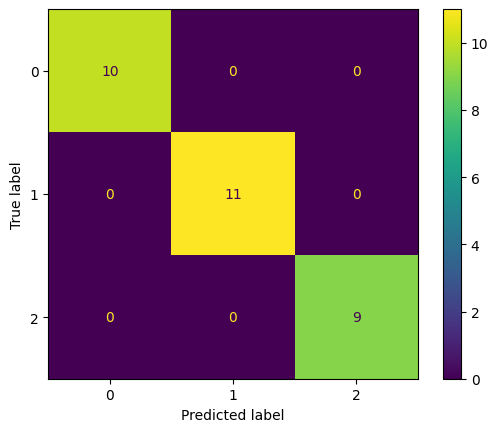

In [14]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()